## Q) 4.3

In [173]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [174]:
vocab_file = 'hw4_vocab.txt'
unigram_file = 'hw4_unigram.txt'
bigram_file = 'hw4_bigram.txt'

In [175]:
def getContents(filename):
    contents = []
    with open(filename) as f:
        for line in f:
            contents.append(line.strip('\n'))
            
    return contents

In [176]:
vocabs = getContents(vocab_file)
unigram = getContents(unigram_file)
bigrams = getContents(bigram_file)

In [177]:
singleCount = {}

for i in range(len(vocabs)):
    singleCount[vocabs[i]] = int(unigram[i])

In [178]:
doubleCount = {}
doubleCountList = []
for bigram in bigrams:
    splitBigram = bigram.split()
    word1 = vocabs[int(splitBigram[0]) - 1]
    word2 = vocabs[int(splitBigram[1]) - 1]
    count = int(splitBigram[2])
    doubleCount[(word1, word2)] = count
    doubleCountList.append((word1, word2, count))

### a)

In [179]:
singleWordCountDf = pd.DataFrame(list(singleCount.items()), columns=['word', 'count'])

In [180]:
unigramModelDf = singleWordCountDf
unigramModelDf['T'] = singleWordCountDf['count'].agg(sum)
unigramModelDf['P_u_w'] = unigramModelDf['count']/unigramModelDf['T']
unigramModelDf[unigramModelDf['word'].str.contains('^M')]

,word,count,T,P_u_w
53,MILLION,169479,81764926,0.002073
68,MORE,139728,81764926,0.001709
76,MR.,117873,81764926,0.001442
120,MOST,64424,81764926,0.000788
121,MARKET,63807,81764926,0.000780
125,MAY,59680,81764926,0.000730
129,M.,57514,81764926,0.000703
130,MANY,56968,81764926,0.000697
158,MADE,45777,81764926,0.000560
177,MUCH,42076,81764926,0.000515


### b)

In [181]:
doubleWordCountDf = pd.DataFrame(doubleCountList, columns=['word1', 'word2', 'count'])

In [182]:
tempdf = doubleWordCountDf[doubleWordCountDf['word1'] == 'THE']
tempdf['P_b_W_w'] = doubleWordCountDf['count']/singleWordCountDf[singleWordCountDf['word'] == 'THE']['count'].values[0]

C:\Users\vaibh\AppData\Local\Temp/ipykernel_2148/3264781231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['P_b_W_w'] = doubleWordCountDf['count']/singleWordCountDf[singleWordCountDf['word'] == 'THE']['count'].values[0]


In [183]:
tempdf.sort_values(by='P_b_W_w', ascending=False)[:10]

,word1,word2,count,P_b_W_w
993,THE,<UNK>,2371132,0.615020
1058,THE,U.,51556,0.013372
1064,THE,FIRST,45186,0.011720
1060,THE,COMPANY,44949,0.011659
1050,THE,NEW,36439,0.009451
1165,THE,UNITED,33435,0.008672
1086,THE,GOVERNMENT,26230,0.006803
1029,THE,NINETEEN,25641,0.006651
1282,THE,SAME,24239,0.006287
1014,THE,TWO,23752,0.006161


### c)

In [184]:
sentence = "The stock market fell by one hundred points last week"
splitSentence = list(map(str.upper, sentence.split(' ')))

In [185]:
P_u = 1
for word in splitSentence:
    P_u = P_u * (unigramModelDf[unigramModelDf['word'] == word]['P_u_w'].values[0])
P_u = math.log(P_u)

In [186]:
splitSentence.insert(0, '<s>')

In [187]:
P_b = 1
for i in range(len(splitSentence) - 1):
    num = doubleWordCountDf[(doubleWordCountDf['word1'] == splitSentence[i]) & 
                            (doubleWordCountDf['word2'] == splitSentence[i + 1])]['count'].values[0]
    den = unigramModelDf[unigramModelDf['word'] == splitSentence[i]]['count'].values[0]
    P_b = P_b * (num / den)
    
P_b = math.log(P_b)

In [188]:
print(P_u)
print(P_b)

-64.50944034364878
-40.91813213378977


Bigram model yeilds higher log-likelihood

### d)

In [189]:
sentence = "The sixteen officials sold fire insurance"
splitSentence = list(map(str.upper, sentence.split(' ')))

In [190]:
def getUnigramProb(word, log=True):
    prob = unigramModelDf[unigramModelDf['word'] == word]['P_u_w'].values[0]
    if log:
        return np.log(prob)
    else:
        return prob

In [191]:
P_u = 0
for word in splitSentence:
    if word in unigramModelDf['word'].values:
        P_u = P_u + getUnigramProb(word)

In [192]:
splitSentence.insert(0, '<s>')

In [193]:
def getBigramProb(word1, word2, log=True):
    if word1 in doubleWordCountDf['word1'].values and \
            word2 in doubleWordCountDf[doubleWordCountDf['word1'] == word1]['word2'].values:
        num = doubleWordCountDf[(doubleWordCountDf['word1'] == word1) & 
                                (doubleWordCountDf['word2'] == word2)]['count'].values[0]
        den = unigramModelDf[unigramModelDf['word'] == word1]['count'].values[0]
        temp = (num / den)
    else:
        temp = 0
    
    if log:
        return np.log(temp)
    else:
        return temp

In [194]:
P_b = 0
for i in range(len(splitSentence) - 1):
    P_b = P_b + getBigramProb(splitSentence[i], splitSentence[i + 1])

C:\Users\vaibh\AppData\Local\Temp/ipykernel_2148/851827573.py:12: RuntimeWarning: divide by zero encountered in log
  return np.log(temp)


In [195]:
print(P_u)
print(P_b)

-44.291934473132606
-inf


### e)

In [196]:
def getMixedProb(word1, word2, l, log=True):
    prob = (l * getUnigramProb(word2, False) + (1 - l) * getBigramProb(word1, word2, False))
    if log:
        return np.log(prob)
    else:
        return prob

In [197]:
def getLogLikelihood(l):
    P_m = 0
    for i in range(1, len(splitSentence)):
        P_m = P_m + getMixedProb(splitSentence[i - 1], splitSentence[i], l)
    return P_m

In [198]:
dx = 0.01
l = 0
lList = []
P_m_list = []

while l <= 1:
    lList.append(l)
    P_m_list.append(getLogLikelihood(l))
    l += dx

C:\Users\vaibh\AppData\Local\Temp/ipykernel_2148/1733256390.py:4: RuntimeWarning: divide by zero encountered in log
  return np.log(prob)


Text(0, 0.5, 'P_m')

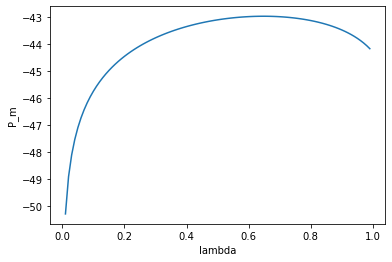

In [199]:
plt.plot(lList, P_m_list)
plt.xlabel('lambda')
plt.ylabel('P_m')

In [200]:
lList[P_m_list.index(max(P_m_list))] # Optimal value of Lambda

0.6500000000000004

# Q) 4.4

In [31]:
nasdaq00 = 'nasdaq00.txt'
nasdaq01 = 'nasdaq01.txt'

In [39]:
def readFile(fileName):
    result = []
    with open(fileName) as f:
        for line in f:
            result.append(float(line.strip('\n')))
    return result

In [40]:
stonks0 = readFile(nasdaq00)
stonks1 = readFile(nasdaq01)

In [143]:
def createDataset(stonks):
    y = []
    x = []
    for i in range(3, len(stonks)):
        y.append(stonks[i])
        x.append([stonks[i - 1], stonks[i - 2], stonks[i - 3]])
    return y, x

In [144]:
y0, x0 = createDataset(stonks0)
y1, x1 = createDataset(stonks1)

In [145]:
y0 = np.asarray(y0)
x0 = np.asarray(x0)
y1 = np.asarray(y1)
x1 = np.asarray(x1)

In [146]:
b0 = np.expand_dims(y0, axis=1) * x0

In [147]:
A0 = np.einsum('ij,ik->ijk', x0, x0)

In [148]:
w = np.linalg.inv(A0.sum(axis=0)) @ b0.sum(axis=0)

### a)

In [149]:
w

array([0.95067337, 0.01560133, 0.03189569])

### b)

In [170]:
rmse0 = np.sqrt(np.mean((y0 - x0.dot(w))**2))

In [171]:
rmse1 = np.sqrt(np.mean((y1 - x1.dot(w))**2))

In [172]:
print(rmse0)
print(rmse1)

117.90844361778288
54.63604967519669
